## Tugas 5 Praktikum Machine Learning
Nama  : Athiya Puteri Hidayat <br>
NIM   : 24060121140128 <br>
Lab   : Machine Learning A1

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [45]:
# Mendefinisikan link dataset
url = "https://archive.ics.uci.edu/static/public/329/data.csv"

# Membaca dataset dari URL
raw_dataset = pd.read_csv(url)

# Memilih kolom-kolom tertentu dari dataset
dataset = raw_dataset.iloc[:, 0:20]

In [32]:
dataset

,quality,pre_screening,ma1,ma2,ma3,ma4,ma5,ma6,exudate1,exudate2,exudate3,exudate3.1,exudate5,exudate6,exudate7,exudate8,macula_opticdisc_distance,opticdisc_diameter,am_fm_classification,Class
0,1,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,1,1,34,34,34,33,31,24,6.071765,0.937472,0.031145,0.003115,0.000000,0.000000,0.000000,0.000000,0.537470,0.116795,0,0
1147,1,1,49,49,49,49,45,37,63.197145,27.377668,8.067688,0.979548,0.001552,0.000000,0.000000,0.000000,0.516733,0.124190,0,0
1148,1,0,49,48,48,45,43,33,30.461898,13.966980,1.763305,0.137858,0.011221,0.000000,0.000000,0.000000,0.560632,0.129843,0,0
1149,1,1,39,36,29,23,13,7,40.525739,12.604947,4.740919,1.077570,0.563518,0.326860,0.239568,0.174584,0.485972,0.106690,1,1


In [46]:
features = ['quality', 'pre_screening', 'ma1', 'ma2', 'ma3',	'ma4',	'ma5',	'ma6',	'exudate1',	'exudate2',	'exudate3',	'exudate3.1',	'exudate5',	'exudate6',	'exudate7',	'exudate8',	'macula_opticdisc_distance',	'opticdisc_diameter',	'am_fm_classification']
x = dataset.loc[:, features].values
y = dataset.loc[:,['Class']].values
x = StandardScaler().fit_transform(x)
pd.DataFrame(data = x, columns = features).head()

,quality,pre_screening,ma1,ma2,ma3,ma4,ma5,ma6,exudate1,exudate2,exudate3,exudate3.1,exudate5,exudate6,exudate7,exudate8,macula_opticdisc_distance,opticdisc_diameter,am_fm_classification
0,0.059054,0.298213,-0.641486,-0.618782,-0.576463,-0.630029,-0.551116,-0.473745,-0.242917,-0.246003,-0.296966,-0.271509,-0.218324,-0.194409,-0.205124,-0.186169,-1.294763,-0.468656,1.405048
1,0.059054,0.298213,-0.563391,-0.535778,-0.576463,-0.677410,-0.653676,-0.539992,-0.109250,0.032972,-0.465224,-0.408593,-0.224256,-0.197212,-0.205175,-0.186281,-0.082168,2.006054,-0.711719
2,0.059054,0.298213,0.920417,0.958299,1.046665,1.028299,0.936006,0.784951,-0.141383,0.227196,0.344463,0.769037,0.335538,0.152330,-0.110043,-0.164808,0.274283,1.121516,-0.711719
3,0.059054,0.298213,0.647084,0.667784,0.783456,0.838776,0.730886,0.652456,-0.404199,-0.214977,0.035830,0.316953,0.112573,0.056919,-0.195765,-0.199541,-1.423814,0.354501,-0.711719
4,0.059054,0.298213,0.217561,0.294265,0.388641,0.412349,0.525766,0.387468,-0.788069,-0.672306,-0.717335,-0.468311,-0.225828,-0.200905,-0.214968,-0.208100,-1.685874,0.844102,-0.711719


Pada kode tersebut memisahkan data fitur ke dalam variabel x dan target ke dalam variabel y pada dataset wine, serta melakukan proses normalisasi. Awalnya, variabel x diisi dengan data fitur dari dataset, sementara variabel y diisi dengan label yang ada dalam dataset tersebut. Selanjutnya, dilakukan normalisasi data fitur menggunakan metode StandardScaler dari Scikit-Learn, dan hasil normalisasi disimpan kembali pada variabel x.

In [47]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head(5)

,principal component 1,principal component 2
0,-1.570254,-0.447534
1,-1.163305,-0.867397
2,2.318484,0.573619
3,1.891089,0.083968
4,1.269317,-1.007964


Potongan kode di atas memanfaatkan Principal Component Analysis (PCA) untuk mengurangi dimensi dari data fitur yang sebelumnya telah dinormalisasi. Awalnya, objek PCA dengan dua komponen utama diinisialisasi menggunakan PCA(n_components=2). Selanjutnya, fungsi fit_transform dari PCA digunakan untuk mentransformasikan data fitur yang telah dinormalisasi (x) menjadi dua komponen utama. Hasil transformasi disimpan dalam variabel principalComponents. Data hasil transformasi tersebut kemudian diubah menjadi DataFrame menggunakan pd.DataFrame, dengan kolom dinamai 'principal component 1' dan 'principal component 2'. DataFrame ini disimpan dalam variabel principalDf.

Selanjutnya, kode menggabungkan DataFrame principalDf, yang berisi dua fitur hasil reduksi dimensi ('principal component 1' dan 'principal component 2'), dengan target yang ada dalam DataFrame df. Akibatnya, terbentuklah DataFrame baru dengan nama finalDf, yang mencakup kolom 'principal component 1', 'principal component 2', dan kolom target kelas.

In [40]:
dataset.groupby('Class').size()

Class
0    540
1    611
dtype: int64

In [48]:
finalDf = pd.concat([principalDf, dataset[['Class']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,Class
0,-1.570254,-0.447534,0
1,-1.163305,-0.867397,0
2,2.318484,0.573619,1
3,1.891089,0.083968,0
4,1.269317,-1.007964,1


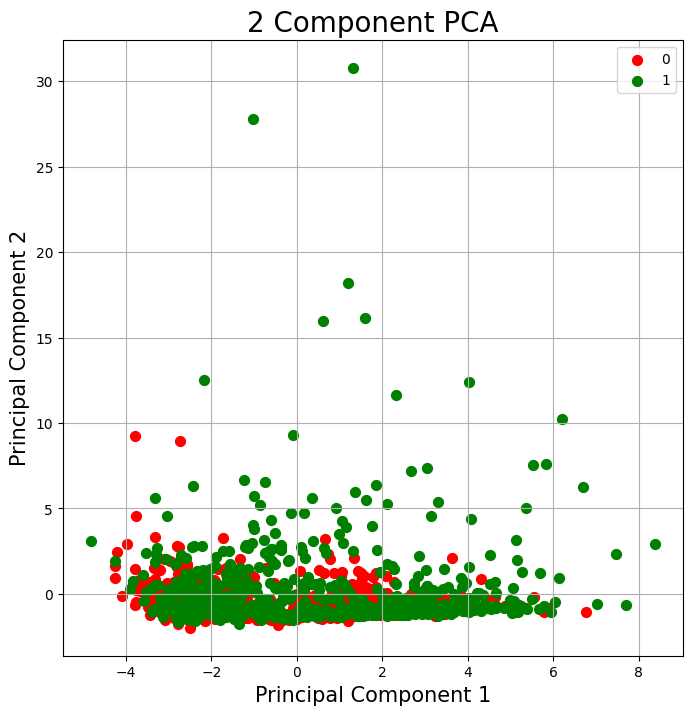

In [56]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Potongan kode di atas menghasilkan scatter plot 2D dari 'principal component 1' dan 'principal component 2', yang merupakan hasil dari reduksi dimensi menggunakan PCA. Scatter plot ini memiliki ukuran 8x8 inci dan digunakan untuk memvisualisasikan sebaran data dari dua kelas target (0, 1). Setiap kelas ditampilkan dengan warna yang berbeda, yaitu merah dan hijau, sehingga mempermudah pemahaman visual terhadap distribusi data dalam ruang dua dimensi. Untuk membedakan kelas-kelas target, sebuah legenda ditambahkan ke dalam plot.

In [57]:
pca.explained_variance_ratio_

array([0.32850408, 0.25563426])

Pada kode di atas menampilkan rasio varians yang dijelaskan oleh masing-masing principal component setelah dilakukan reduksi dimensi menggunakan atribut explained_variance_ratio_ dari PCA. Hasil keluaran berupa array [0.32850408, 0.25563426] mengindikasikan bahwa principal component 1 menjelaskan sekitar 36.8% dari total varians, sementara principal component 2 menjelaskan sekitar 25.6%. Gabungan dari keduanya memberikan gambaran tentang sejauh mana informasi yang dapat direpresentasikan oleh dua komponen utama tersebut dalam dataset.